In [27]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

humanCapital = pd.read_excel('Data/SBDC Human Capital Survey Data 4.1.24.xlsx')

In [28]:
humanCapital = humanCapital.drop(['ResponseId', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 
                                  'RecordedDate', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                                  'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q_RecaptchaScore'], axis=1)

humanCapital.columns = humanCapital.iloc[0]
humanCapital = humanCapital[1:].reset_index(drop=True)

humanCapital

,What state/network are you completing the survey for?,Center Information #1 - Number of FT Staff,Center Information #1 - Number of PT Staff,Center Information #1 - Number of contracted consultants,"Center Information #1 - Total contact, prep, travel time for 2023","Center Information #1 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #1 - Number of clients,Center Information #1 - What is the population of the region?,Center Information #1 - Is the center location rural or urban?,Center Information #1 - Does the Center Director have employees reporting directly to them?,Center Information #1 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #2 - Number of FT Staff,Center Information #2 - Number of PT Staff,Center Information #2 - Number of contracted consultants,"Center Information #2 - Total contact, prep, travel time for 2023","Center Information #2 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #2 - Number of clients,Center Information #2 - What is the population of the region?,Center Information #2 - Is the center location rural or urban?,Center Information #2 - Does the Center Director have employees reporting directly to them?,Center Information #2 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #3 - Number of FT Staff,Center Information #3 - Number of PT Staff,Center Information #3 - Number of contracted consultants,"Center Information #3 - Total contact, prep, travel time for 2023","Center Information #3 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #3 - Number of clients,Center Information #3 - What is the population of the region?,Center Information #3 - Is the center location rural or urban?,Center Information #3 - Does the Center Director have employees reporting directly to them?,Center Information #3 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #4 - Number of FT Staff,Center Information #4 - Number of PT Staff,Center Information #4 - Number of contracted consultants,"Center Information #4 - Total contact, prep, travel time for 2023","Center Information #4 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #4 - Number of clients,Center Information #4 - What is the population of the region?,Center Information #4 - Is the center location rural or urban?,Center Information #4 - Does the Center Director have employees reporting directly to them?,Center Information #4 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #5 - Number of FT Staff,Center Information #5 - Number of PT Staff,Center Information #5 - Number of contracted consultants,"Center Information #5 - Total contact, prep, travel time for 2023","Center Information #5 - Total hours spent on other program-related activity (training, stakeholders, PD, etc.)",Center Information #5 - Number of clients,Center Information #5 - What is the population of the region?,Center Information #5 - Is the center location rural or urban?,Center Information #5 - Does the Center Director have employees reporting directly to them?,Center Information #5 - Is that Center Director responsible for paperwork? (HR paperwork for employees/review and reconciliation of invoices for consultants),Center Information #6 - Number of FT Staff,Center Information #6 - Number of PT Staff,Center Information #6 - Number of contracted consultants,"Center Information #6 - Total contact, prep, travel time for 2023","Center Information #6 - Tota

# Data Engineering

In [29]:
nDakota = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'North Dakota']
sDakota = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'South Dakota']
iowa = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'The best State (Iowa)']
wyoming = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Wyoming SBDC Network ']
nebraska = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Nebraska Business Development Center (NBDC)'].drop(
    ['What state/network are you completing the survey for?'], axis=1)
newMexico = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'New Mexico Small Business Development Center']
kansas = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Kansas']
montana = humanCapital[humanCapital['What state/network are you completing the survey for?'] == 'Montana']

In [30]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in nebraska.columns if 'Center Information #' in col]))

nebraska_centers = []
for center in centers:
    center_columns = [col for col in nebraska.columns if f'Center Information #{center} ' in col]
    
    center_df = nebraska[center_columns].copy() 
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Nebraska'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]
        
        globals()[f'nebraska{center}'] = center_df
        nebraska_centers.append(globals()[f'nebraska{center}'])

In [31]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in sDakota.columns if 'Center Information #' in col]))

sDakota_centers = []
for center in centers:
    center_columns = [col for col in sDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = sDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 

        center_df.loc[:, 'State'] = 'South Dakota'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'sDakota{center}'] = center_df
        sDakota_centers.append(globals()[f'sDakota{center}'])

In [32]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in nDakota.columns if 'Center Information #' in col]))

nDakota_centers = []
for center in centers:
    center_columns = [col for col in nDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = nDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'North Dakota'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'nDakota{center}'] = center_df
        nDakota_centers.append(globals()[f'nDakota{center}'])

In [33]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in iowa.columns if 'Center Information #' in col]))

iowa_centers = []
for center in centers:
    center_columns = [col for col in iowa.columns if f'Center Information #{center} ' in col]
    
    center_df = sDakota[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Iowa'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'iowa{center}'] = center_df
        iowa_centers.append(globals()[f'iowa{center}'])

In [34]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in wyoming.columns if 'Center Information #' in col]))

wyoming_centers = []
for center in centers:
    center_columns = [col for col in sDakota.columns if f'Center Information #{center} ' in col]
    
    center_df = wyoming[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Wyoming'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'wyoming{center}'] = center_df
        wyoming_centers.append(globals()[f'wyoming{center}'])

In [35]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in newMexico.columns if 'Center Information #' in col]))

newMexico_centers = []
for center in centers:
    center_columns = [col for col in newMexico.columns if f'Center Information #{center} ' in col]
    
    center_df = newMexico[center_columns].copy()

    if not center_df.isna().all().all():
        center_df['State'] = 'New Mexico'
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]
        
        globals()[f'newMexico{center}'] = center_df
        newMexico_centers.append(center_df)

In [36]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in kansas.columns if 'Center Information #' in col]))

kansas_centers = []
for center in centers:
    center_columns = [col for col in kansas.columns if f'Center Information #{center} ' in col]  # Correct reference here
    
    center_df = kansas[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Kansas'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'kansas{center}'] = center_df
        kansas_centers.append(globals()[f'kansas{center}'])

In [37]:
centers = sorted(set([col.split(' ')[2].replace('#', '') for col in montana.columns if 'Center Information #' in col]))

montana_centers = []
for center in centers:
    center_columns = [col for col in newMexico.columns if f'Center Information #{center} ' in col]
    
    center_df = montana[center_columns].copy()
    
    if not center_df.isna().all().all(): 
        center_df.loc[:, 'State'] = 'Montana'
        
        center_df = center_df[['State'] + [col for col in center_df.columns if col != 'State']]

        globals()[f'montana{center}'] = center_df
        montana_centers.append(globals()[f'montana{center}'])

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

state_center_lists = [
    nebraska_centers, sDakota_centers, nDakota_centers, iowa_centers, 
    wyoming_centers, newMexico_centers, kansas_centers, montana_centers
]
state_names = [
    'Nebraska', 'South Dakota', 'North Dakota', 'Iowa', 
    'Wyoming', 'New Mexico', 'Kansas', 'Montana'
]

data = []

for state_centers, state_name in zip(state_center_lists, state_names):
    center_number = 1
    for center_df in state_centers:
        ft_staff_cols = [col for col in center_df.columns if 'Number of FT Staff' in col]
        pt_staff_cols = [col for col in center_df.columns if 'Number of PT Staff' in col]
        consultant_cols = [col for col in center_df.columns if 'Number of contracted consultants' in col]
        counseling_time_cols = [col for col in center_df.columns if 'Total contact, prep, travel time for 2023' in col]
        population_cols = [col for col in center_df.columns if 'What is the population of the region' in col]
        location_cols = [col for col in center_df.columns if 'Is the center location rural or urban' in col]
        hr_support_cols = [col for col in center_df.columns if 'HR paperwork for employees/review and reconciliation of invoices for consultants' in col]
        client_cols = [col for col in center_df.columns if 'Number of clients' in col]
        program_related_time_cols = [col for col in center_df.columns if 'Total hours spent on other program-related activity' in col]
        employees_reporting_cols = [col for col in center_df.columns if 'Does the Center Director have employees reporting directly to them' in col]

        total_ft_staff = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in ft_staff_cols]) if ft_staff_cols else 0
        total_pt_staff = sum([pd.to_numeric(center_df[col], errors='coerce').sum() * 0.5 for col in pt_staff_cols]) if pt_staff_cols else 0
        total_consultants = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in consultant_cols]) if consultant_cols else 0
        total_staff = total_ft_staff + total_pt_staff + total_consultants
        
        total_counseling_time = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in counseling_time_cols]) if counseling_time_cols else 0
        
        population = sum([pd.to_numeric(center_df[col].astype(str).str.replace(',', ''), errors='coerce').sum() for col in population_cols]) if population_cols else 0
        
        location = center_df[location_cols].iloc[0] if location_cols and not center_df[location_cols].isna().all().all() else ''
        is_urban = 1 if isinstance(location, str) and 'urban' in location.lower() else 0
        
        hr_support = 1 if center_df[hr_support_cols].eq('Yes').any().any() else 0
        num_clients = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in client_cols]) if client_cols else 0
        program_related_time = sum([pd.to_numeric(center_df[col], errors='coerce').sum() for col in program_related_time_cols]) if program_related_time_cols else 0
        has_employees_reporting = 1 if center_df[employees_reporting_cols].eq('Yes').any().any() else 0

        data.append({
            'State': state_name,
            'Center Number': center_number,
            'Total Staff': total_staff,
            'Population': population,
            'Is Urban': is_urban,
            'HR Support': hr_support,
            'Total Counseling Time': total_counseling_time,
            'Number of Clients': num_clients,
            'Program-Related Activity Time': program_related_time,
            'Has Employees Reporting': has_employees_reporting
        })

        center_number += 1

center_analysis = pd.DataFrame(data)

numeric_cols = center_analysis.columns.difference(['State'])
center_analysis[numeric_cols] = center_analysis[numeric_cols].apply(pd.to_numeric, errors='coerce')

predictors = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
              'Program-Related Activity Time', 'Has Employees Reporting', 'Responsible for Paperwork']

# for predictor in predictors:
#     plt.figure(figsize=(8, 6))
    
#     plt.scatter(center_analysis[predictor], center_analysis['Total Counseling Time'], alpha=0.5)
    
#     plt.title(f'Relationship between {predictor} and Total Counseling Time')
#     plt.xlabel(predictor)
#     plt.ylabel('Total Counseling Time')
    
#     plt.show()

center_analysis.insert(2, 'Center Name', pd.Series(['Omaha', 'Lincoln', 'Kearney', 'Wayne', 'North Platte', 'Scottsbluff', 'Chadron'] + [np.nan] * (len(center_analysis) - 7)))

center_analysis.to_excel('Deliverables/SBDC Human Capital Full Dataset.xlsx', index=False)
center_analysis

,State,Center Number,Center Name,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting
0,Nebraska,1,Omaha,5.0,811625,0,0,857.00,424,832.00,1
1,Nebraska,2,Lincoln,1.5,503116,0,1,363.00,106,125.00,1
2,Nebraska,3,Kearney,1.0,244314,0,1,525.00,83,120.00,0
3,Nebraska,4,Wayne,1.0,254971,0,0,392.00,86,480.00,0
4,Nebraska,5,North Platte,1.0,56691,0,0,95.00,40,20.00,0
5,Nebraska,6,Scottsbluff,1.0,80866,0,0,62.00,52,226.00,0
6,Nebraska,7,Chadron,1.5,25078,0,1,231.00,28,72.00,1
7,South Dakota,1,NaN,2.0,104677,0,1,703.53,170,0.00,1
8,South Dakota,2,NaN,1.0,67488,0,0,341.97,98,0.00,0
9,South Dakota,3,NaN,3.0,197874,0,1,837.55,346,0.00,1


# Linear Regression

In [39]:
# from scipy.stats import zscore

# center_analysis_z = center_analysis
# center_analysis_z[numeric_cols] = center_analysis_z[numeric_cols].apply(zscore)
# center_analysis_z = center_analysis_z.drop(['Is Urban', 'HR Support', 'Has Employees Reporting'], axis=1)

# center_analysis_z

In [40]:
from scipy.optimize import nnls
import numpy as np


center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

center_analysis.index = np.arange(1, len(center_analysis) + 1)

X = center_analysis[['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
                     'Has Employees Reporting']].values
y = center_analysis['Total Counseling Time'].values

coef, _ = nnls(X, y)

predicted_counseling_times = np.dot(X, coef)

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

# center_analysis

In [41]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, predicted_counseling_times, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

model_summary = sm.OLS(y, X).fit().summary()
print(model_summary)

Root Mean Squared Error (RMSE): 585.1657526126766
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              64.81
Date:                Sat, 07 Dec 2024   Prob (F-statistic):                    2.95e-22
Time:                        05:24:48   Log-Likelihood:                         -475.95
No. Observations:                  62   AIC:                                      961.9
Df Residuals:                      57   BIC:                                      972.5
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


center_analysis = pd.DataFrame(data)

numeric_cols = center_analysis.columns.difference(['State'])
center_analysis[numeric_cols] = center_analysis[numeric_cols].apply(pd.to_numeric, errors='coerce')

center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

center_analysis.index = np.arange(1, len(center_analysis) + 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=290, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
predicted_counseling_times = rf_model.predict(X)

r2 = r2_score(y, predicted_counseling_times)
print(f"R² score: {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

center_analysis = center_analysis.reset_index(drop=True)
center_analysis.insert(2, 'Center Name', pd.Series(['Omaha', 'Lincoln', 'Kearney', 'Wayne', 'North Platte', 'Scottsbluff', 'Chadron'] + [np.nan] * (len(center_analysis) - 7)))

center_analysis

R² score: 0.8562018664027786
Root Mean Squared Error: 602.7324208275583


,State,Center Number,Center Name,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Predicted Counseling Time,Expected Hours per Consultant,Expected Hours per Client
0,Nebraska,1,Omaha,5.0,811625,0,0,857.00,424,832.00,1,2770.310000,554.062000,6.533750
1,Nebraska,2,Lincoln,1.5,503116,0,1,363.00,106,125.00,1,1090.187448,726.791632,10.284787
2,Nebraska,3,Kearney,1.0,244314,0,1,525.00,83,120.00,0,546.589793,546.589793,6.585419
3,Nebraska,4,Wayne,1.0,254971,0,0,392.00,86,480.00,0,488.255000,488.255000,5.677384
4,Nebraska,5,North Platte,1.0,56691,0,0,95.00,40,20.00,0,178.469586,178.469586,4.461740
5,Nebraska,6,Scottsbluff,1.0,80866,0,0,62.00,52,226.00,0,343.234931,343.234931,6.600672
6,Nebraska,7,Chadron,1.5,25078,0,1,231.00,28,72.00,1,222.658517,148.439011,7.952090
7,South Dakota,1,NaN,2.0,104677,0,1,703.53,170,0.00,1,734.887931,367.443966,4.322870
8,South Dakota,2,NaN,1.0,67488,0,0,341.97,98,0.00,0,384.172000,384.172000,3.920122
9,South Dakota,3,NaN,3.0,197874,0,1,837.55,346,0.00,1,959.452138,319.817379,2.772983


In [43]:
rf_model = RandomForestRegressor(n_estimators=290, random_state=42)
rf_model.fit(X, y)

predicted_counseling_times = rf_model.predict(X)

center_analysis['Predicted Counseling Time'] = predicted_counseling_times

center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

center_analysis.to_excel('Deliverables/Predicted Consultant and Client Hours.xlsx', index=False)
center_analysis

,State,Center Number,Center Name,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Predicted Counseling Time,Expected Hours per Consultant,Expected Hours per Client
0,Nebraska,1,Omaha,5.0,811625,0,0,857.00,424,832.00,1,1540.443483,308.088697,3.633121
1,Nebraska,2,Lincoln,1.5,503116,0,1,363.00,106,125.00,1,919.195241,612.796828,8.671653
2,Nebraska,3,Kearney,1.0,244314,0,1,525.00,83,120.00,0,515.024207,515.024207,6.205111
3,Nebraska,4,Wayne,1.0,254971,0,0,392.00,86,480.00,0,488.509310,488.509310,5.680341
4,Nebraska,5,North Platte,1.0,56691,0,0,95.00,40,20.00,0,140.677828,140.677828,3.516946
5,Nebraska,6,Scottsbluff,1.0,80866,0,0,62.00,52,226.00,0,164.665034,164.665034,3.166635
6,Nebraska,7,Chadron,1.5,25078,0,1,231.00,28,72.00,1,215.942241,143.961494,7.712223
7,South Dakota,1,NaN,2.0,104677,0,1,703.53,170,0.00,1,728.950069,364.475034,4.287942
8,South Dakota,2,NaN,1.0,67488,0,0,341.97,98,0.00,0,389.770621,389.770621,3.977251
9,South Dakota,3,NaN,3.0,197874,0,1,837.55,346,0.00,1,877.641862,292.547287,2.536537


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y, predicted_counseling_times)
mse = mean_squared_error(y, predicted_counseling_times)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_counseling_times)

# Calculate Root Mean of actual 'y' values
mean_y = np.mean(y)
root_mean_y = np.sqrt(mean_y)

# Print evaluation metrics
print("Evaluation Metrics for Counseling Times Model:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Evaluation Metrics for Counseling Times Model:
Mean Absolute Error (MAE): 124.2275
Root Mean Squared Error (RMSE): 199.9029
R² Score: 0.9538
Root Mean of Actual Values: 31.2761


In [19]:
from scipy import stats

center_analysis['Z-Score Consultant'] = stats.zscore(center_analysis['Expected Hours per Consultant'])

z_score_outliers_consultant = center_analysis[(center_analysis['Z-Score Consultant'] > 3) | 
                                              (center_analysis['Z-Score Consultant'] < -3)]

center_analysis['Z-Score Client'] = stats.zscore(center_analysis['Expected Hours per Client'])

In [20]:
feature_names = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 
                 'Has Employees Reporting']

importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,Population,0.522176
0,Total Staff,0.289415
4,Number of Clients,0.167118
5,Has Employees Reporting,0.014734
3,HR Support,0.006557
2,Is Urban,0.000000


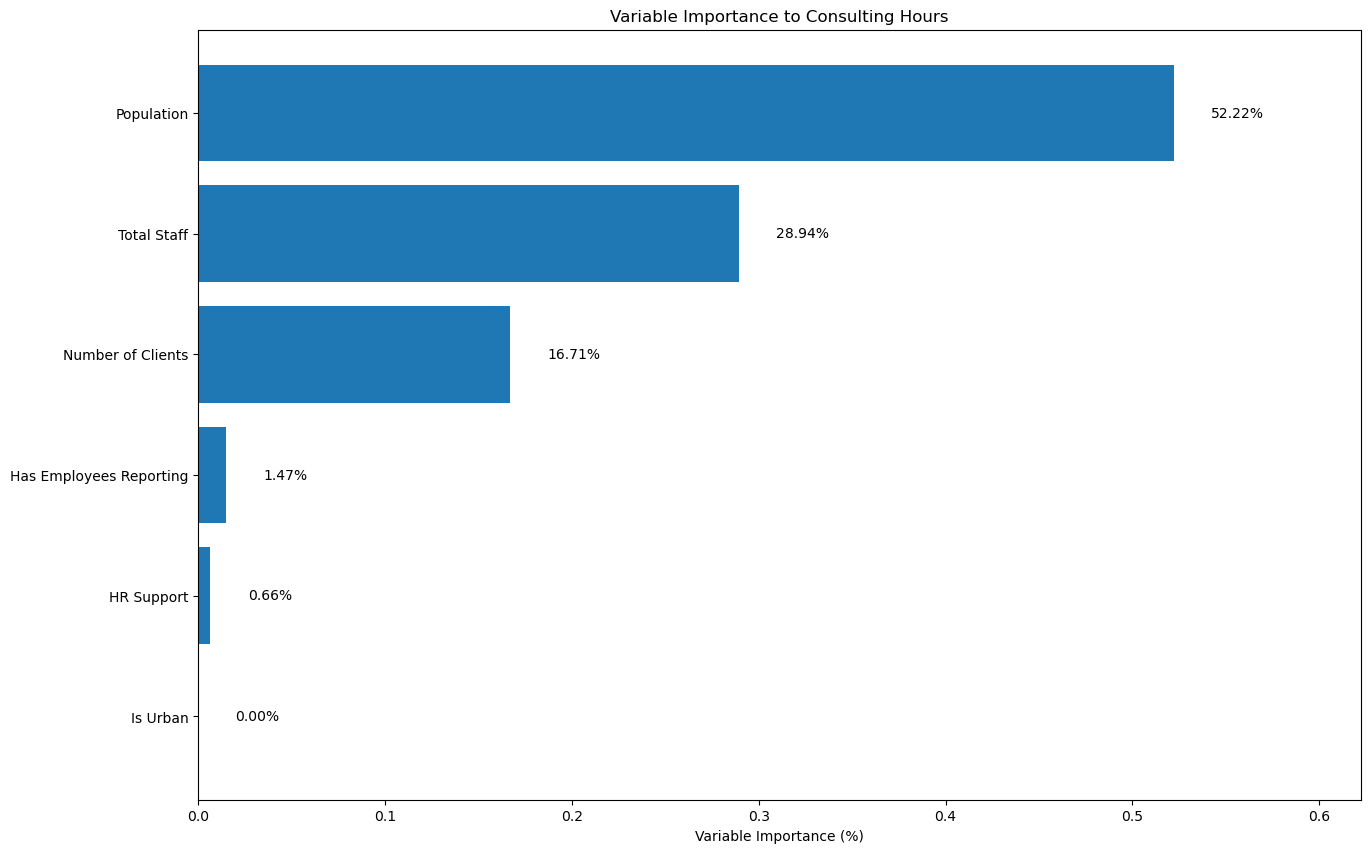

In [21]:
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(15, 10))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width() * 100:.2f}%', va='center')

plt.xlim([0, max(importance_df['Importance']) + 0.1])

plt.xlabel("Variable Importance (%)")
plt.title("Variable Importance to Consulting Hours")

plt.savefig("Deliverables/Variable Importance to Consultant's Hours.png", bbox_inches='tight')

plt.show()

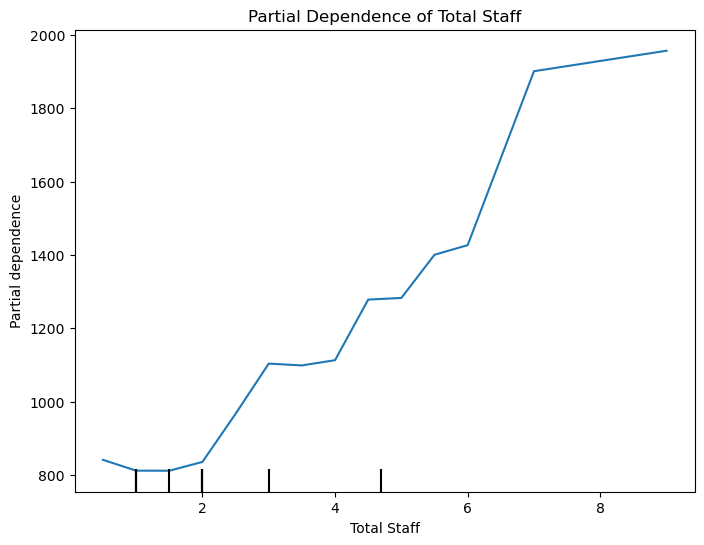

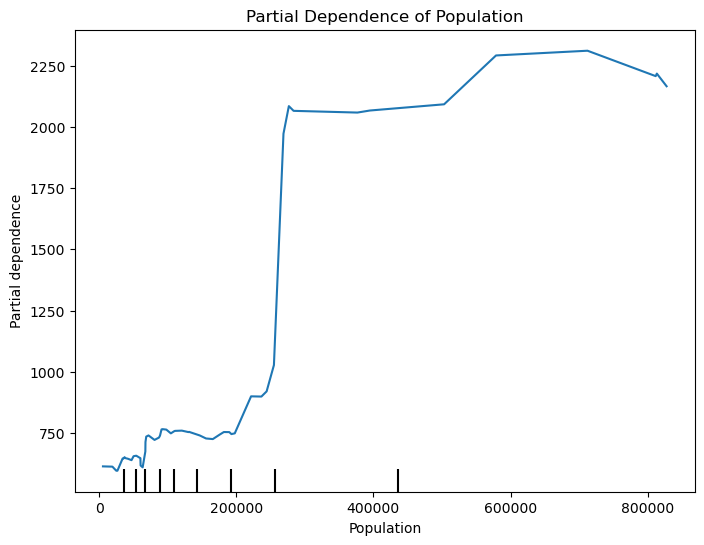

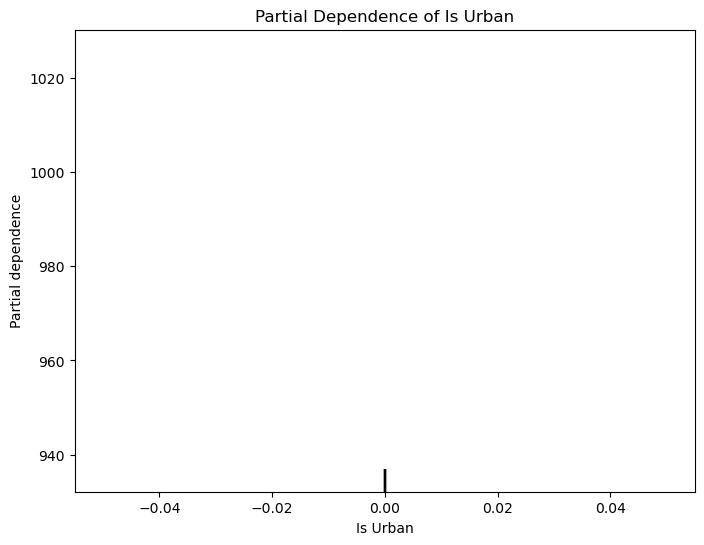

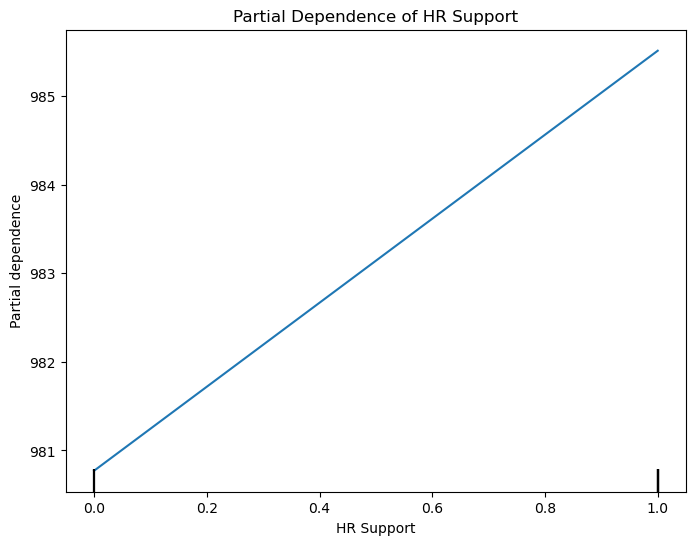

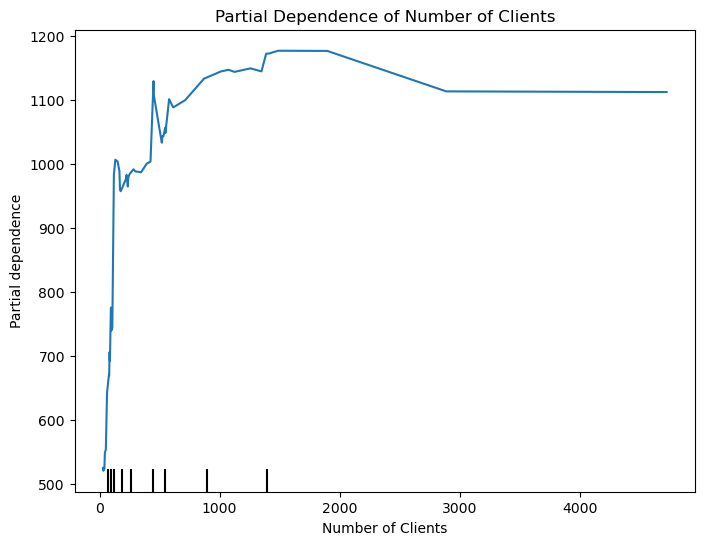

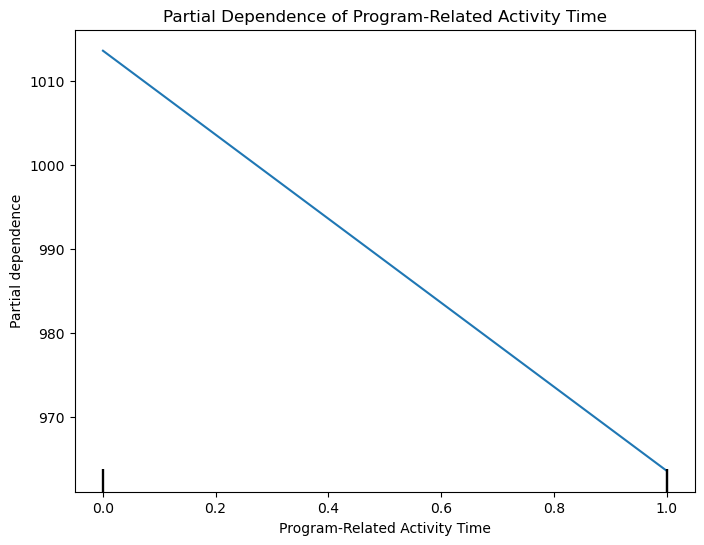

In [22]:
from sklearn.inspection import PartialDependenceDisplay

feature_names = ['Total Staff', 'Population', 'Is Urban', 'HR Support', 'Number of Clients',
                 'Program-Related Activity Time', 'Has Employees Reporting']

fig, ax1 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [0], feature_names=feature_names, ax=ax1)
ax1.set_title('Partial Dependence of Total Staff')
plt.savefig('Deliverables/Total Staff Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax2 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [1], feature_names=feature_names, ax=ax2)
ax2.set_title('Partial Dependence of Population')
plt.savefig('Deliverables/Population Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax3 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [2], feature_names=feature_names, ax=ax3)
ax3.set_title('Partial Dependence of Is Urban')
plt.show()

fig, ax4 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [3], feature_names=feature_names, ax=ax4)
ax4.set_title('Partial Dependence of HR Support')
plt.show()

fig, ax5 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [4], feature_names=feature_names, ax=ax5)
ax5.set_title('Partial Dependence of Number of Clients')
plt.savefig('Deliverables/Number of Clients Partial Dependency.png', bbox_inches='tight')
plt.show()

fig, ax6 = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X, [5], feature_names=feature_names, ax=ax6)
ax6.set_title('Partial Dependence of Program-Related Activity Time')
plt.savefig('Deliverables/Program-Related Activity Partial Dependency.png', bbox_inches='tight')
plt.show()

In [50]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'data' is already provided as a dictionary or DataFrame
center_analysis = pd.DataFrame(data)

# Convert numeric columns (excluding 'State') to numeric
numeric_cols = center_analysis.columns.difference(['State'])
center_analysis[numeric_cols] = center_analysis[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Filter out rows with invalid values
center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

# Reset index
center_analysis.index = np.arange(1, len(center_analysis) + 1)

# Define features and target
X = center_analysis.drop(columns=['Total Counseling Time', 'State'])
y = center_analysis['Total Counseling Time']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=290, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data and overall data
y_pred = xgb_model.predict(X_test)
predicted_counseling_times = xgb_model.predict(X)

# Calculate R² score and RMSE
r2 = r2_score(y, predicted_counseling_times)
print(f"R² score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

# Add predictions to the DataFrame
center_analysis['Predicted Counseling Time'] = predicted_counseling_times

# Calculate expected hours per consultant and per client
center_analysis['Expected Hours per Consultant'] = center_analysis['Predicted Counseling Time'] / center_analysis['Total Staff']
center_analysis['Expected Hours per Client'] = center_analysis['Predicted Counseling Time'] / center_analysis['Number of Clients']

# Replace negative values with 0
center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Hours per Client'] = center_analysis['Expected Hours per Client'].apply(lambda x: max(x, 0))

# Reset index and insert center names
center_analysis = center_analysis.reset_index(drop=True)
center_analysis.insert(2, 'Center Name', pd.Series(['Omaha', 'Lincoln', 'Kearney', 'Wayne', 
                                                   'North Platte', 'Scottsbluff', 'Chadron'] + 
                                                   [np.nan] * (len(center_analysis) - 7)))

# Display the final DataFrame
center_analysis

R² score: 0.8335
Root Mean Squared Error: 828.5908


,State,Center Number,Center Name,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Predicted Counseling Time,Expected Hours per Consultant,Expected Hours per Client
0,Nebraska,1,Omaha,5.0,811625,0,0,857.00,424,832.00,1,3367.121826,673.424365,7.941325
1,Nebraska,2,Lincoln,1.5,503116,0,1,363.00,106,125.00,1,363.001160,242.000773,3.424539
2,Nebraska,3,Kearney,1.0,244314,0,1,525.00,83,120.00,0,524.999695,524.999695,6.325298
3,Nebraska,4,Wayne,1.0,254971,0,0,392.00,86,480.00,0,392.000031,392.000031,4.558140
4,Nebraska,5,North Platte,1.0,56691,0,0,95.00,40,20.00,0,95.001350,95.001350,2.375034
5,Nebraska,6,Scottsbluff,1.0,80866,0,0,62.00,52,226.00,0,335.639374,335.639374,6.454603
6,Nebraska,7,Chadron,1.5,25078,0,1,231.00,28,72.00,1,230.999329,153.999552,8.249976
7,South Dakota,1,NaN,2.0,104677,0,1,703.53,170,0.00,1,703.530396,351.765198,4.138414
8,South Dakota,2,NaN,1.0,67488,0,0,341.97,98,0.00,0,341.970001,341.970001,3.489490
9,South Dakota,3,NaN,3.0,197874,0,1,837.55,346,0.00,1,837.551880,279.183960,2.420670


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Load data into a DataFrame (assuming `data` is provided)
center_analysis = pd.DataFrame(data)

center_analysis.insert(2, 'Center Name', pd.Series(['Omaha', 'Lincoln', 'Kearney', 'Wayne', 'North Platte', 'Scottsbluff', 'Chadron'] + [np.nan] * (len(center_analysis) - 7)))

# Filter out invalid data
center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

# Define features (X) and target (y) for counseling hours
X_hours = center_analysis[['Total Staff', 'Population', 'Is Urban', 'HR Support', 
                           'Number of Clients', 'Has Employees Reporting']]
y_hours = center_analysis['Total Counseling Time']

# Define a log transformer and a preprocessing pipeline
log_transformer = FunctionTransformer(np.log1p, validate=True)
preprocessor = ColumnTransformer(
    transformers=[('log', log_transformer, ['Population', 'Total Staff'])],
    remainder='passthrough'
)

# Build the pipeline with a Random Forest model
pipeline_hours = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', 
                                    min_samples_split=2, min_samples_leaf=1, random_state=42))
])

# Train the model pipeline
pipeline_hours.fit(X_hours, y_hours)

# Define sensitivity adjustments (e.g., -10% to +10% in 10 steps)
adjustments = np.linspace(-10, 10, 10)
ideal_hours_per_center = []

# Perform sensitivity analysis for each center
for index, row in center_analysis.iterrows():
    adjusted_predictions = []
    for adj in adjustments:
        adjusted_features = row.copy()
        adjusted_features['Total Staff'] *= (1 + adj / 100)
        adjusted_features['Population'] *= (1 + adj / 100)
        adjusted_features['Number of Clients'] *= (1 + adj / 100)

        # Create a DataFrame for the adjusted features
        adjusted_data = pd.DataFrame([adjusted_features], columns=X_hours.columns)
        
        # Predict counseling hours for adjusted features
        adjusted_prediction = pipeline_hours.predict(adjusted_data)
        adjusted_predictions.append(adjusted_prediction[0])

    # Compute the average predicted counseling hours for this center
    ideal_hours = np.mean(adjusted_predictions)
    ideal_hours_per_center.append(ideal_hours)

# Add the ideal counseling hours to the DataFrame
center_analysis['Ideal Counseling Hours'] = ideal_hours_per_center

# Display the updated DataFrame (for testing purposes)
center_analysis.to_excel('Deliverables/Sensitivity Analysis Results.xlsx', index=False)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming `center_analysis` has the actual and predicted counseling hours
actual_hours = center_analysis['Total Counseling Time']
predicted_hours = center_analysis['Ideal Counseling Hours']

# Calculate evaluation metrics
mae = mean_absolute_error(actual_hours, predicted_hours)
rmse = np.sqrt(mean_squared_error(actual_hours, predicted_hours))
r2 = r2_score(actual_hours, predicted_hours)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Evaluation Metrics:
Mean Absolute Error (MAE): 177.17
Root Mean Squared Error (RMSE): 276.65
R² Score: 0.91


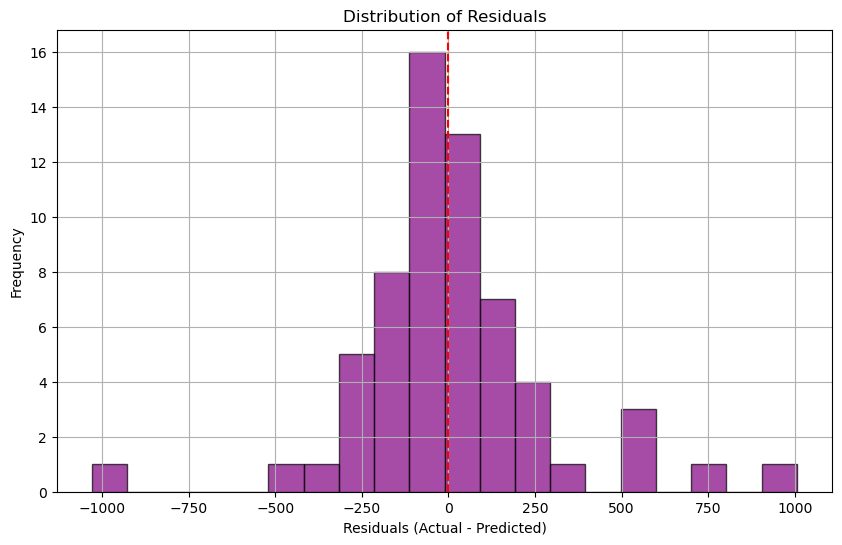

In [25]:
residuals = center_analysis['Total Counseling Time'] - center_analysis['Ideal Counseling Hours']
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

In [26]:
center_analysis

,State,Center Number,Center Name,Total Staff,Population,Is Urban,HR Support,Total Counseling Time,Number of Clients,Program-Related Activity Time,Has Employees Reporting,Ideal Counseling Hours
0,Nebraska,1,Omaha,5.0,811625,0,0,857.00,424,832.00,1,1885.294235
1,Nebraska,2,Lincoln,1.5,503116,0,1,363.00,106,125.00,1,846.326525
2,Nebraska,3,Kearney,1.0,244314,0,1,525.00,83,120.00,0,662.029545
3,Nebraska,4,Wayne,1.0,254971,0,0,392.00,86,480.00,0,673.702700
4,Nebraska,5,North Platte,1.0,56691,0,0,95.00,40,20.00,0,166.657890
5,Nebraska,6,Scottsbluff,1.0,80866,0,0,62.00,52,226.00,0,198.403155
6,Nebraska,7,Chadron,1.5,25078,0,1,231.00,28,72.00,1,266.887875
7,South Dakota,1,NaN,2.0,104677,0,1,703.53,170,0.00,1,752.153525
8,South Dakota,2,NaN,1.0,67488,0,0,341.97,98,0.00,0,375.600825
9,South Dakota,3,NaN,3.0,197874,0,1,837.55,346,0.00,1,914.026105


# Comparisons

In [ ]:
center_analysis.columns

In [ ]:
def hours_per_client(x):
    x['Hours Per Client'] = round(x['Total Counseling Time'] / x['Number of Clients'], 2)
    return x

def hours_per_consultant(x):
    x['Hours Per Consultant'] = round(x['Total Counseling Time'] / x['Total Staff'], 2)
    return x

center_analysis = center_analysis.apply(hours_per_client, axis=1)
center_analysis = center_analysis.apply(hours_per_consultant, axis=1)

In [ ]:
nebraska_centers = center_analysis[center_analysis['State'] == 'Nebraska']

nebraska_centers['Center Name'] = nebraska_centers['Center Name'].astype(str).fillna("Unknown")

plt.figure(figsize=(14, 10))
bars = plt.bar(nebraska_centers['Center Name'], nebraska_centers['Ideal Counseling Hours'], color='royalblue')

plt.title('Expected Hours per Consultant for Nebraska Centers', fontsize=16)
plt.xlabel('Center', fontsize=14)
plt.ylabel('Expected Hours per Consultant', fontsize=14)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{round(height, 2)}', ha='center', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.savefig('Deliverables/Nebraska Expected Consultant Hours Per Center.png', bbox_inches='tight')
plt.show()

In [ ]:
state_avg_expected_hours = center_analysis.groupby('State')['Ideal Counseling Hours'].mean().reset_index()

state_avg_expected_hours.columns = ['State', 'Average Expected Hours per Consultant']

state_avg_expected_hours

In [ ]:
center_analysis.columns

In [ ]:
columns_to_compare = ['Ideal Counseling Hours', 'Hours Per Client', 'Hours Per Consultant']

state_comparisons = center_analysis.groupby('State')[columns_to_compare].mean().round(2)

state_comparisons

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].bar(state_comparisons.index, state_comparisons['Hours Per Consultant'], color='#0061a0')
axes[0].set_title('Average Expected Hours per Consultant by State', fontsize=16)
axes[0].set_xlabel('State', fontsize=14)
axes[0].set_ylabel('Hours per Consultant', fontsize=14)

for i, v in enumerate(state_comparisons['Hours Per Consultant']):
    axes[0].text(i, v + 5, str(v), ha='center', fontsize=12)

axes[0].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)

axes[1].bar(state_comparisons.index, state_comparisons['Hours Per Client'], color='purple')
axes[1].set_title('Average Expected Hours per Client by State', fontsize=16)
axes[1].set_xlabel('State', fontsize=14)
axes[1].set_ylabel('Expected Hours per Client', fontsize=14)

for i, v in enumerate(state_comparisons['Hours Per Client']):
    axes[1].text(i, v + 0.03, str(v), ha='center', fontsize=12)

axes[1].set_xticklabels(state_comparisons.index, rotation=45, ha='right', fontsize=12, wrap=True)

plt.tight_layout()

plt.savefig('Deliverables/All Centers Expected Consultant and Client Hours Comparisons.png', bbox_inches='tight')
plt.show()

In [ ]:
import seaborn as sns

center_analysis['State_Center'] = center_analysis['State'] + ' - ' + center_analysis.index.astype(str)

plt.figure(figsize=(20, 15))

sns.barplot(x='Expected Hours per Consultant', y='State_Center', data=center_analysis, hue='State', dodge=False)

plt.title('Comparison of Centers by Expected Hours per Consultant', fontsize=16)
plt.xlabel('Expected Hours per Consultant', fontsize=14)
plt.ylabel('Centers (Grouped by State)', fontsize=14)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Ideal number of staff

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

center_analysis = pd.DataFrame(data)

center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) & 
                                  (center_analysis['Number of Clients'] > 0) & 
                                  (center_analysis['Total Counseling Time'] > 0)]

X_staff = center_analysis[['Total Counseling Time', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 'Has Employees Reporting']]
y_staff = center_analysis['Total Staff']


log_transformer = FunctionTransformer(np.log1p, validate=True)
preprocessor = ColumnTransformer(
    transformers=[
        ('log', log_transformer, ['Population', 'Total Counseling Time'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, n_jobs=-1, scoring='r2')
grid_search.fit(X_staff, y_staff)

best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

cv_scores = cross_val_score(best_model, X_staff, y_staff, cv=5, scoring='r2')
print(f"Cross-validated R² score: {np.mean(cv_scores)}")

predicted_staff = best_model.predict(X_staff)
r2 = r2_score(y_staff, predicted_staff)
rmse = np.sqrt(mean_squared_error(y_staff, predicted_staff))
print(f"Final R² score on full data: {r2}")
print(f"Final RMSE on full data: {rmse}")

center_analysis['Predicted Staff Number'] = predicted_staff

center_analysis['Expected Hours per Consultant'] = center_analysis['Total Counseling Time'] / center_analysis['Predicted Staff Number']
center_analysis['Expected Clients per Consultant'] = center_analysis['Number of Clients'] / center_analysis['Predicted Staff Number']

center_analysis['Expected Hours per Consultant'] = center_analysis['Expected Hours per Consultant'].apply(lambda x: max(x, 0))
center_analysis['Expected Clients per Consultant'] = center_analysis['Expected Clients per Consultant'].apply(lambda x: max(x, 0))

center_analysis.to_excel('Deliverables/Staff Predictions.xlsx', index=False)

In [ ]:
sensitivity_range = np.linspace(-0.1, 0.1, 10)  

center_analysis['Predicted Ideal Staff'] = best_model.predict(X_staff)

sensitivity_results = {}

for feature in X_staff.columns:
    sensitivity_results[feature] = []
    
    original_values = X_staff[feature].copy()
    
    for change in sensitivity_range:
        X_staff[feature] = original_values * (1 + change)
        predicted_staff = best_model.predict(X_staff)
        
        sensitivity_results[feature].append(predicted_staff.mean())
    
    X_staff[feature] = original_values

sensitivity_df = pd.DataFrame(sensitivity_results, index=sensitivity_range * 100)

fig, axs = plt.subplots(len(X_staff.columns), 1, figsize=(10, 20))
for i, feature in enumerate(X_staff.columns):
    axs[i].plot(sensitivity_df.index, sensitivity_df[feature], marker='o')
    axs[i].set_title(f"Sensitivity Analysis for Predicted Staff Based on Changes in {feature}")
    axs[i].set_xlabel("Percentage Change in Feature")
    axs[i].set_ylabel("Average Predicted Staff")

plt.tight_layout()
plt.show()

In [ ]:
sensitivity_range = np.linspace(-0.1, 0.1, 10)  

center_analysis['Predicted Ideal Staff'] = best_model.predict(X_staff)

sensitivity_results = {}

for feature in X_staff.columns:
    sensitivity_results[feature] = []
    
    original_values = X_staff[feature].copy()
    
    for change in sensitivity_range:
        X_staff[feature] = original_values * (1 + change)
        predicted_staff = best_model.predict(X_staff)
        
        sensitivity_results[feature].append(predicted_staff.mean())
    
    X_staff[feature] = original_values

sensitivity_df = pd.DataFrame(sensitivity_results, index=sensitivity_range * 100)

for feature in X_staff.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(sensitivity_df.index, sensitivity_df[feature], marker='o', color='purple')
    plt.title(f"Sensitivity Analysis for Predicted Staff Based on Changes in {feature}")
    plt.xlabel("Percentage Change in Feature")
    plt.ylabel("Average Predicted Staff")
    plt.grid(True)
    plt.tight_layout()
    
    plt.savefig(f'Deliverables/Sensitivity_Analysis_{feature}.png')
    plt.close()

In [ ]:
center_analysis = pd.DataFrame(data)
center_analysis = center_analysis[(center_analysis['Total Staff'] > 0) &
                                  (center_analysis['Number of Clients'] > 0) &
                                  (center_analysis['Total Counseling Time'] > 0)]

X_staff = center_analysis[['Total Counseling Time', 'Population', 'Is Urban', 'HR Support', 'Number of Clients', 'Has Employees Reporting']]
y_staff = center_analysis['Total Staff']

log_transformer = FunctionTransformer(np.log1p, validate=True)
preprocessor = ColumnTransformer(
    transformers=[('log', log_transformer, ['Population', 'Total Counseling Time'])],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_split=2, min_samples_leaf=1, random_state=42))
])
pipeline.fit(X_staff, y_staff)

adjustments = np.linspace(-10, 10, 10) 
ideal_staff_per_center = []

for index, row in center_analysis.iterrows():
    adjusted_predictions = []
    for adj in adjustments:
        adjusted_features = row.copy()
        adjusted_features['Total Counseling Time'] *= (1 + adj / 100)
        adjusted_features['Population'] *= (1 + adj / 100)
        adjusted_features['Number of Clients'] *= (1 + adj / 100)

        adjusted_data = pd.DataFrame([adjusted_features], columns=X_staff.columns)
        
        adjusted_prediction = pipeline.predict(adjusted_data)
        adjusted_predictions.append(adjusted_prediction[0])

    ideal_staff = np.mean(adjusted_predictions)
    ideal_staff_per_center.append(ideal_staff)

center_analysis['Ideal Staff'] = ideal_staff_per_center

center_analysis.to_excel('Deliverables/Sensitivity Analysis Results.xlsx', index=False)